<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Selecci%C3%B3n_de_variables_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar datos
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [2]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [3]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

DESCRIPCION DE LAS VARIABLES

# IMPORTACION DE DATOS

In [ ]:
infogeneral = pd.read_csv('general_data.csv', sep = ",")
infogeneral

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [ ]:
encuesta_satisfaccion = pd.read_csv("employee_survey_data.csv", sep = ",")
encuesta_satisfaccion.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
evaluacion_desempeño= pd.read_csv("manager_survey_data.csv", sep = ",")
evaluacion_desempeño.head(10)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
5,6,3,3
6,7,3,4
7,8,3,4
8,9,3,4
9,10,3,3


In [ ]:
tiempo_dedicacion= pd.read_excel("time_work.xlsx", header = 0)
tiempo_dedicacion.set_index("EmployeeID", inplace = True)
tiempo_dedicacion.head(5)

,mean_time
EmployeeID,
1,6.8702
2,7.3160
3,6.8161
4,6.7892
5,7.8776


# Normalización

### VARIABLES ORDINALES A STRING

In [22]:
tabla_base = pd.read_csv('tabla_base.csv', sep = ",")

In [24]:
tabla_base.isnull().sum()

desercion_año_anterior           0
frecuencia_viajes                0
departamento                     0
distancia_domicilio              0
educacion                        0
formacion                        0
genero                           0
nivel_de_cargo                   0
nombre_cargo                     0
estado_civil                     0
ingresos_mensuales               0
empresas_anteriores              0
porcentaje_aumentosalario        0
nivel_de_opciones                0
años_de_trabajo                  0
numero_capacitaciones            0
años_jefe_actual                 0
satisfaccion_entorno             0
satisfaccion_laboral             0
conciliacion_faimilar_laboral    0
implicacion_laboral              0
tiempo_prom_dia                  0
dtype: int64

In [25]:
tablabase=tabla_base.copy()
columnascategoricas=["numero_capacitaciones","frecuencia_viajes"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
genero                            object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
tiempo_prom_dia                  float64
dtype: object

In [26]:
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,genero,nivel_de_cargo,nombre_cargo,estado_civil,ingresos_mensuales,...,nivel_de_opciones,años_de_trabajo,numero_capacitaciones,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,tiempo_prom_dia,desercion
0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,...,0,1.0,6,0,3.0,4.0,2.0,3,6.8702,0
1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,...,1,6.0,3,4,3.0,2.0,4.0,2,7.3160,1
2,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,...,3,5.0,2,3,2.0,2.0,1.0,3,6.8161,0
3,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,...,3,13.0,5,5,4.0,4.0,3.0,2,6.7892,0
4,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,...,2,9.0,2,4,4.0,1.0,3.0,3,7.8776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,...,1,10.0,5,2,4.0,1.0,3.0,3,8.3169,0
4406,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,...,0,10.0,2,2,4.0,4.0,3.0,2,5.8972,0
4407,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,...,0,5.0,4,2,1.0,3.0,3.0,3,7.1495,0
4408,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,...,1,10.0,2,8,4.0,1.0,3.0,2,9.1876,0


In [27]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

,distancia_domicilio,educacion,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,nivel_de_opciones,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,...,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_1,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
0,6,2,1,131160,1.0,11,0,1.0,0,3.0,...,0,1,0,0,0,0,0,0,0,1
1,10,1,1,41890,0.0,23,1,6.0,4,3.0,...,0,0,1,0,0,0,1,0,0,0
2,17,4,4,193280,1.0,15,3,5.0,3,2.0,...,0,1,0,0,0,1,0,0,0,0
3,2,5,3,83210,3.0,11,3,13.0,5,4.0,...,0,1,0,0,0,0,0,0,1,0
4,10,1,1,23420,4.0,12,2,9.0,4,4.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,5,4,1,60290,3.0,17,1,10.0,2,4.0,...,0,0,1,0,0,0,0,0,1,0
4406,2,4,1,26790,2.0,15,0,10.0,2,4.0,...,1,0,0,0,0,1,0,0,0,0
4407,25,2,2,37020,0.0,20,0,5.0,2,1.0,...,0,1,0,0,0,0,0,1,0,0
4408,18,2,1,23980,0.0,14,1,10.0,8,4.0,...,1,0,0,0,0,1,0,0,0,0


### NORMALIZACION

In [28]:
tablabase1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   distancia_domicilio                     4410 non-null   int64  
 1   educacion                               4410 non-null   int64  
 2   nivel_de_cargo                          4410 non-null   int64  
 3   ingresos_mensuales                      4410 non-null   int64  
 4   empresas_anteriores                     4410 non-null   float64
 5   porcentaje_aumentosalario               4410 non-null   int64  
 6   nivel_de_opciones                       4410 non-null   int64  
 7   años_de_trabajo                         4410 non-null   float64
 8   años_jefe_actual                        4410 non-null   int64  
 9   satisfaccion_entorno                    4410 non-null   float64
 10  satisfaccion_laboral                    4410 non-null   floa

In [29]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

columnasenteras=["distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_jefe_actual","implicacion_laboral"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [30]:
from sklearn.metrics import accuracy_score
# Entrenamiento del modelo
modelo = LogisticRegression()
# Ajustar el modelo a los datos
modelo.fit(X_train_std, y_train)
# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train_std)
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.861


In [31]:
y_pred = modelo.predict(X_test_std)
# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.863


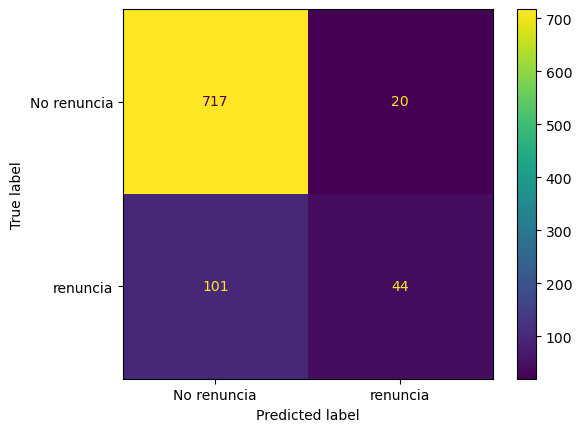

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [33]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.6875
Recall: 0.30344827586206896
Especificidad: 0.9728629579375848
F1 score: 0.4210526315789474


In [34]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.14
RMSE 0.37
MAE: 0.14
MAPE: 102122440529943.33
R2: 0.00
R2-adjusted: -0.05


# modelo2

In [35]:
from sklearn.metrics import accuracy_score
X_train_std1=X_train_std.copy()
X_test_std1=X_test_std.copy()
# Entrenamiento del modelo
modelo1 = LogisticRegression(class_weight="balanced",random_state=142)

# Ajustar el modelo a los datos
modelo1.fit(X_train_std1, y_train)

# Desempeño en el entrenamiento
y_train_pred1 = modelo1.predict(X_train_std1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred1) )

Exactitud en el entrenamiento: 0.733


In [36]:
y_pred1 = modelo1.predict(X_test_std1)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred1))

Exactitud en el entrenamiento: 0.737


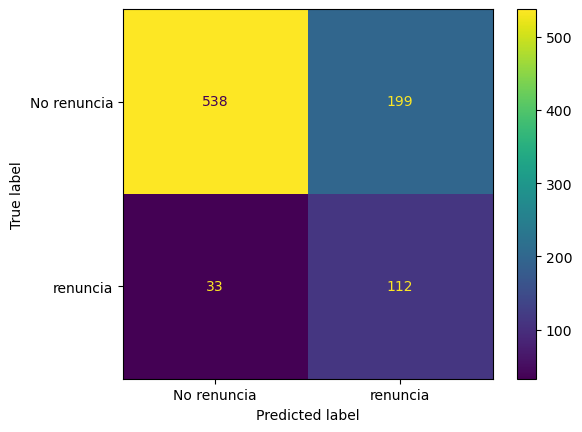

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz1= confusion_matrix(y_test, y_pred1)
matriz_display1 = ConfusionMatrixDisplay(confusion_matrix=matriz1, display_labels=['No renuncia', 'renuncia'])
matriz_display1.plot()
plt.show()

In [38]:
tn, fp, fn, tp = matriz1.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.36012861736334406
Recall: 0.7724137931034483
Especificidad: 0.7299864314789688
F1 score: 0.49122807017543857


In [39]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred1))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred1))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred1))
print("R2: %.2f" % r2_score(y_test, y_pred1))

# R2 ajustado
r2 = r2_score(y_test, y_pred1)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.26
RMSE 0.51
MAE: 0.26
MAPE: 1016118283272935.00
R2: -0.91
R2-adjusted: -1.02


# SELECCION DE VARIABLES

## UMBRAL DE VARIANZA- SOLO PARA NUMERICAS



## PARA CATEGORICAS ES MAS DESDE LO GRAFICO

## SELECCION UNIVARIANTE

## PARA VARIABLE DEPENDIENTE CATEGORICO